In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv(r"C:\Users\dell\Documents\apprentissage_ML_DL_Python_R_udemy\codes\House_Price_PP1.csv",header=0,index_col=0)

In [8]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airportYES,n_hos_beds,n_hot_rooms,waterbodyLake,waterbodyNone,waterbodyRiver,rainfall,moy_dist
1,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.19200,0,0,1,23,4.0875
2,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.17280,1,0,0,42,4.9675
3,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,46.19856,0,1,0,38,4.9675
4,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.26720,1,0,0,45,6.0650
5,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.28960,1,0,0,55,6.0625


In [9]:
import statsmodels.api as sm #Cross-sectional models and methods
                            # The API focuses on models and the most frequently used statistical test, and tools

#### statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [10]:
X=sm.add_constant(df['room_num'])
X # vecteur X de Y=X*theta + E

,const,room_num
1,1.0,6.575
2,1.0,6.421
3,1.0,7.185
4,1.0,6.998
5,1.0,7.147
...,...,...
502,1.0,6.593
503,1.0,6.120
504,1.0,6.976
505,1.0,6.794


In [11]:
# Ordinary Least Squares
lm=sm.OLS(df['price'],X).fit()

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.31e-74
Time:                        13:16:48   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### linear regression by using sklearn

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
y=df['price']
x=df[['room_num']] #2dim

In [15]:
model=LinearRegression()

In [16]:
model.fit(x,y)

LinearRegression()

In [17]:
print(model.intercept_,model.coef_)

-34.65924312309721 [9.09966966]


In [38]:
help(model)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [18]:
y_predict=model.predict(x)

In [40]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

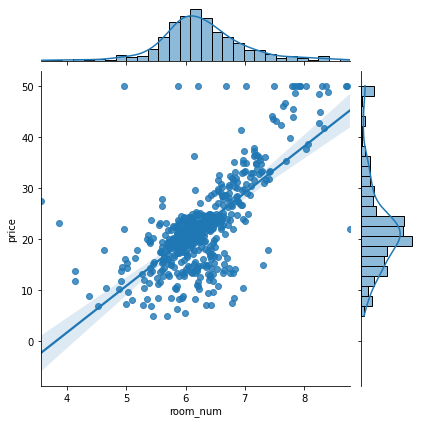

In [19]:
sns.jointplot(x=df['room_num'],y=df['price'],kind='reg')